In [1]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer, Trainer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the trained model and tokenizer from the specified checkpoint
checkpoint_dir = ""
model = AutoModelForSequenceClassification.from_pretrained(checkpoint_dir)
tokenizer = AutoTokenizer.from_pretrained(checkpoint_dir)

In [3]:
# Load the test dataset
file_path = "" 
test_df = pd.read_excel(file_path, engine='openpyxl')

In [4]:
# Encode the labels
label_encoder = LabelEncoder()
test_df["class"] = label_encoder.fit_transform(test_df["class"])

In [5]:
# Convert the test DataFrame to a Dataset object
from datasets import Dataset
test_df = test_df.dropna(subset=['text'])
test_dataset = Dataset.from_pandas(test_df)

# Tokenize the test dataset
def tokenize_function(examples):
    return tokenizer(examples['text'], truncation=True, padding=True)

tokenized_test_dataset = test_dataset.map(tokenize_function, batched=True)
tokenized_test_dataset = tokenized_test_dataset.remove_columns(["text"])
tokenized_test_dataset = tokenized_test_dataset.rename_column("class", "labels")

print(tokenized_test_dataset)

Map:   0%|          | 0/46396 [00:00<?, ? examples/s]

Dataset({
    features: ['labels', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 46396
})


In [7]:
# Create a Trainer object for evaluation (no training will be performed)
trainer = Trainer(
    model=model,
    tokenizer=tokenizer
)

# Evaluate the model on the test set and get predictions
predictions, labels, _ = trainer.predict(tokenized_test_dataset)
preds = np.argmax(predictions, axis=1)

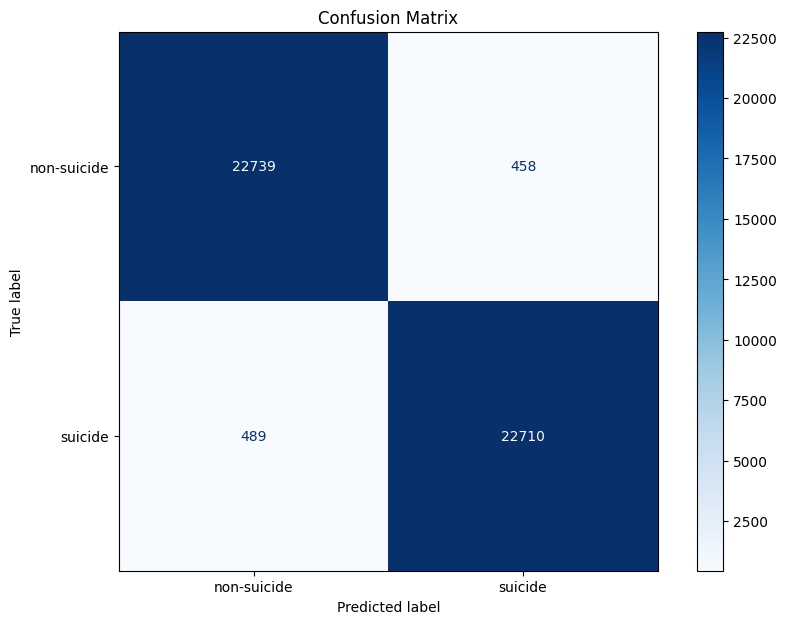

In [9]:
# Create a confusion matrix
cm = confusion_matrix(labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Display the confusion matrix
plt.figure(figsize=(10, 7))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Confusion Matrix")
plt.savefig("")
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy 
accuracy = accuracy_score(labels, preds)

# Precision 
precision = precision_score(labels, preds)  # default is 'binary' for binary classification

# Recall 
recall = recall_score(labels, preds)  # default is 'binary'

# F1-score 
f1 = f1_score(labels, preds)  # default is 'binary'

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9795887576515216
Precision: 0.9802313535911602
Recall: 0.9789215052372947
F1 Score: 0.9795759915457114


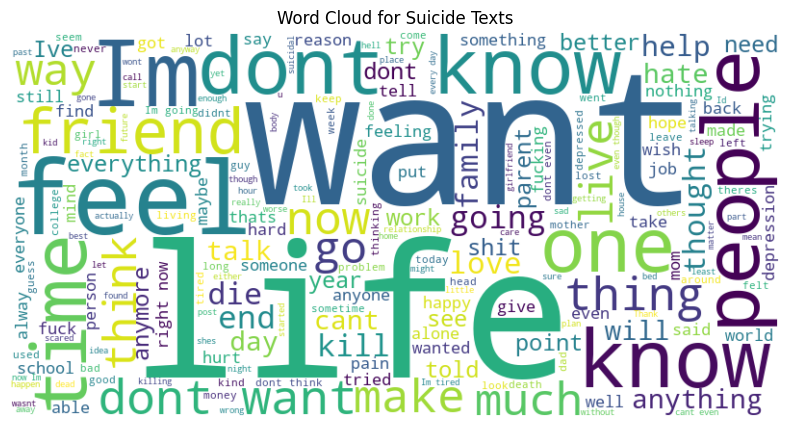

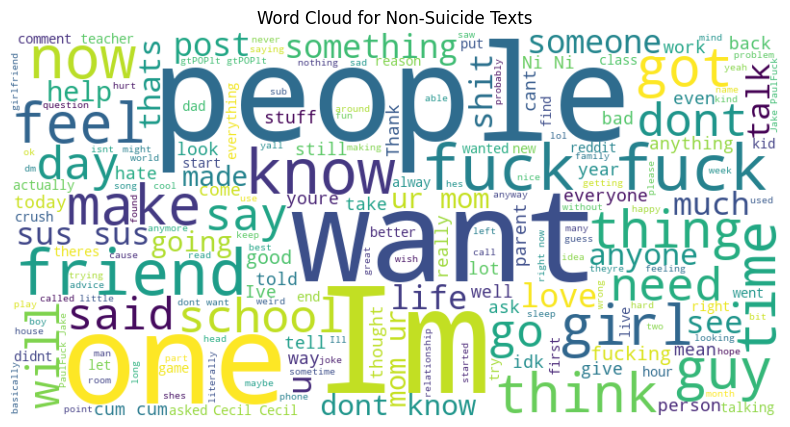

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

file_path = "" 
train_df = pd.read_excel(file_path, engine='openpyxl')

train_df['text'] = train_df['text'].astype(str)

# Filter by 'suicide' label 
suicide_text = " ".join(review for review in train_df[train_df['class'] == 'suicide']['text'])
custom_stopwords = set(STOPWORDS).union({'filler'})

# Word cloud for suicide texts
suicide_wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=custom_stopwords).generate(suicide_text)

# Display the word cloud for suicide texts
plt.figure(figsize=(10, 5))
plt.imshow(suicide_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Suicide Texts")
plt.show()

# A word cloud for 'non-suicide' texts:
non_suicide_text = " ".join(review for review in train_df[train_df['class'] == 'non-suicide']['text'])

# Generate the word cloud for non-suicide texts
non_suicide_wordcloud = WordCloud(width=800, height=400, background_color='white',stopwords=custom_stopwords).generate(non_suicide_text)

# Display the word cloud for non-suicide texts
plt.figure(figsize=(10, 5))
plt.imshow(non_suicide_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Non-Suicide Texts")
plt.show()